# 목차

### 0. Import
 - [Import Library](#Import-Library)
 - [Load Data](#Load-Data)

### 1. Data Preprocessing

### 2. Feature Vectorization
- [CounterVectorizer](#CounterVectorizer)
- [TfdifVectorizer](#TfdifVectorizer)
- [BOWVectorizer](#BOWVectorizer)

### 3. Modeling

### 4. Feature Importance

# 0. Import

### Import Library

In [ ]:
!pip install konlpy
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import nltk
from konlpy.tag import Okt
from tqdm import tqdm
import requests
okt = Okt()
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
import collections
stemmer = LancasterStemmer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#review_df = pd.read_csv('./labeledTrainData.tsv',header=0,sep="\t",quoting=3)
review_df = pd.read_csv('/content/drive/MyDrive/프로젝트/감성분석_IMDB 영화평/labeledTrainData.tsv',header=0,sep="\t",quoting=3)[:5000]
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


=> sentiment의 1 : 긍정적 평가, sentiment의 0 : 부정적 평가

# 1. Data Preprocessing

In [ ]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [ ]:
# <<br> html태그 -> replace함수로 공백 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

#정규 표현식 모듈인 re이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x : re.sub("^a-zA-Z"," ",x))

In [ ]:
#target 칼럼 추출
class_df = review_df['sentiment']

#review 칼럼 추출
feature_df = review_df.drop(columns=['id','sentiment'],axis=1,inplace=False)

#review 칼럼 train, test분할(train_test_split(X,y))
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size = 0.3, random_state=156)
X_train.shape, X_test.shape

((3500, 1), (1500, 1))

In [ ]:
X_train

,review
3243,"""As horror fans we all know that blind rentals..."
3188,"""Cut to the chase, this is one of the five wor..."
3063,"""\""Sky Captain\"" may be considered an homage t..."
469,"""The lovely Danish actress Sonja Richter steal..."
2689,"""OK - as far as the 2 versions of this movie. ..."
...,...
2103,"""This 1947 film stars and was directed and wri..."
3842,"""After having watched \""Guinea Pig\"", two ques..."
1892,"""This was the funniest piece of film/tape I ha..."
3082,"""I was going to give it an 8, but since you pe..."


# 2. Feature Vetcorization

### CountVectorizer

- 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우

In [ ]:
#stop words = English, filtering, ngram = (1,2)로 설정 후 피처백터화
cnt_vect = CountVectorizer(stop_words='english', ngram_range = (1,2))
cnt_vect.fit(X_train['review'])

#X_train데이터 피처 백처화 변환 수행
X_train_cnt_vect = cnt_vect.transform(X_train['review'])
print('학습데이터 크기 : ',X_train_cnt_vect.shape)
#X_test데이터 피처 백처화 변환 수행
X_test_cnt_vect = cnt_vect.transform(X_test['review'])
print('테스트데이터 크기 : ',X_test_cnt_vect.shape)

학습데이터 크기 :  (3500, 342198)
테스트데이터 크기 :  (1500, 342198)


### TfidfVectorizer

- 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티

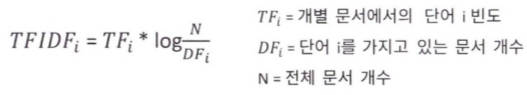

In [ ]:
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range = (1,2),max_df=300)
tfidf_vect.fit(X_train['review'])

#X_train데이터 피처 백처화 변환 수행
X_train_tfidf_vect = tfidf_vect.transform(X_train['review'])
print('학습데이터 크기 : ',X_train_tfidf_vect.shape)
#X_test데이터 피처 백처화 변환 수행
X_test_tfidf_vect = tfidf_vect.transform(X_test['review'])
print('테스트데이터 크기 : ',X_test_tfidf_vect.shape)

학습데이터 크기 :  (3500, 342091)
테스트데이터 크기 :  (1500, 342091)


### BOWVectorizer

- 1. 단어 토큰화를 진행합니다.

In [ ]:
# #문장 토큰화(하나의 행에 문장이 여러개 들어있음)
# sentences_map = {}
# for i in tqdm(review_df['review'].index):
#     text = review_df.loc[i,'review']
#     sentences = sent_tokenize(review_df.loc[i,'review'])
#     sentences_map[i] = sentences

# #sententces를 list형태로 변형
# sentences_list = list(sentences_map.values())

In [ ]:
# #단어 토큰화
# word_list = []
# for i in tqdm(review_df['review'].index):
#     word_list.append(word_tokenize(str(sentences_list[i])))
# print(word_list)

In [ ]:
#단어 토큰화
word_map = {}
for i in tqdm(review_df['review'].index):
    text = review_df.loc[i,'review']
    words = word_tokenize(review_df.loc[i,'review'])
    word_map[i] = words

#words_map을 list형태로 변형
word_list = list(word_map.values())

- 2. 모든 단어를 중복 제거 후 칼럼 형태로 나열합니다. 각 단어에 고유의 인덱스를 부여합니다.

In [ ]:
for i in range(3):
    print(word_list[i])

['``', 'With', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'MJ', 'i', "'ve", 'started', 'listening', 'to', 'his', 'music', ',', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', ',', 'watched', 'The', 'Wiz', 'and', 'watched', 'Moonwalker', 'again', '.', 'Maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', '.', 'Moonwalker', 'is', 'part', 'biography', ',', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', '.', 'Some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'MJ', "'s", 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', "m'kay", '.', 'Visually', 'impressive', 'but', 'of', 

In [ ]:
word_unique_list = []
for value in tqdm(word_list):
    word_unique_list.extend(value)
    word_unique_list = list(set(word_unique_list))

print(word_unique_list)

100%|██████████| 5000/5000 [00:22<00:00, 225.49it/s]

['Visions', 'Jerusalem', 'suplexing', 'Flu', 'ruminating', 'naif', 'thin.\\', 'self-loathing', 'Smart', "'blind", '101', 'Knight', 'magical', 'shall', 'Ronald', 'butt-kicking', 'lively', 'beef', 'benning', 'Carmichael', 'Cadet', 'Altieri', 'Anil', 'Vic', 'transplanted', 'audiences', 'Two\\', 'Port', 'flanked', 'Version', 'State', 'Rudolph', 'toughness', 'pre-fame', 'yearly', 'Olsen', 'spoken', 'condor', 'Colgate', 'detonator', 'STROMBOLI', 'Stifler', 'all-mighty', 'need-', 'Cupido', 'Toyko', 'Shell', 'Bergeron\\', 'Van', 'nosebleed', 'f/x', 'Precinct', 'humor/comedy', 'head-over-heels', 'Jafa', 'TEARS', 'alongwith', 'birthday', 'Darwell', 'treadmill', 'Dragon.\\', 'Mamie', 'mourners', 'governors', 'RETURN', 'clumsy', 'Cowboy', 'short.I', 'self-conscious', 'Huertas', 'puppets', 'débutante', 'decade', 'Search', 'inhumanly', 'snares', 'racing', 'Caution', 'Connecticut', 'Anjelica', 'day-glo', 'Atwill', 'Bodyline\\', 'flounced', 'viewpoints', 'dewy', 'sex\\', 'thumping', 'language\\', 'Hal

- 3. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어에 기재합니다.

In [ ]:
word_df = pd.DataFrame(columns = word_unique_list)
word_df

,Visions,Jerusalem,suplexing,Flu,ruminating,naif,thin.\,self-loathing,Smart,'blind,...,handle,premonition,Allan,steady,wingnut,Jungle\,claim,Marchand,comprehension,inquiring


In [ ]:
datas = []
for i in tqdm(review_df['review'].index):
    word_series = pd.Series(collections.Counter(word_list[i])) #값별 개수를 도출
    data = word_series.to_dict()
    datas.append(data)

100%|██████████| 5000/5000 [00:01<00:00, 2727.30it/s]


In [ ]:
word_list_df = pd.DataFrame(datas, index = review_df.index)
word_list_df

,``,With,all,this,stuff,going,down,at,the,moment,...,alterego-,Eamonn,screwballs\,unique.It,rapidly.The,mentors,fantastic.It,nowadays.I,nudity.I,decent.The
0,1,1.0,4.0,11.0,1.0,3.0,1.0,2.0,17.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,3.0,NaN,NaN,NaN,NaN,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,2.0,NaN,NaN,NaN,NaN,3.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,NaN,1.0,2.0,1.0,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,1,NaN,1.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 4.Sentiment칼럼을 붙입니다.

In [ ]:
word_list_df['sentiment'] = review_df['sentiment']
word_list_df['sentiment']

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    0
4998    1
4999    1
Name: sentiment, Length: 5000, dtype: int64

In [ ]:
word_list_df = word_list_df.fillna(0)
word_list_df

,``,With,all,this,stuff,going,down,at,the,moment,...,alterego-,Eamonn,screwballs\,unique.It,rapidly.The,mentors,fantastic.It,nowadays.I,nudity.I,decent.The
0,1,1.0,4.0,11.0,1.0,3.0,1.0,2.0,17.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,3.0,0.0,0.0,0.0,0.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,2.0,0.0,0.0,0.0,0.0,3.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.0,1.0,2.0,1.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,1,0.0,1.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = word_list_df.drop("sentiment", axis=1) #sectors빼고 출력
y = word_list_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# 3. Modeling

In [ ]:
#CounterVectorized 감성 예측
lr_clf = LogisticRegression(solver='liblinear',C=10)
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CounterVectorized LR 정확도 : ', accuracy_score(y_test,pred))

CounterVectorized LR 정확도 :  0.844


In [ ]:
#TfidVectorizer 감성 예측
lr_clf = LogisticRegression(solver='liblinear',C=10)
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TfidfVectorizer LR 정확도 : ', accuracy_score(y_test,pred))

TfidfVectorizer LR 정확도 :  0.8586666666666667


In [ ]:
#BOWVectorizer 감성 예측
lr_clf = LogisticRegression(solver='liblinear',C=10)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print('BOWVectorizer RF 정확도 : ', accuracy_score(y_test,pred))

BOWVectorizer RF 정확도 :  0.8273333333333334


# 4. Feature Importance

In [ ]:
#BOW기반 피쳐 중요성
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
imp = rf.feature_importances_
imp_df = pd.DataFrame(imp, index=X.columns, columns=["imp"])
imp_df = imp_df.sort_values("imp", ascending=False)
imp_df.head(10)

,imp
bad,0.008337
worst,0.007127
great,0.005132
waste,0.004547
awful,0.004507
and,0.004262
?,0.004231
n't,0.003585
nothing,0.003305
of,0.003001
